In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
samsung = pd.read_csv('samsung_cleaned.csv', sep=',')
samsung

,Name,CPU,Display,OS,length,width,height,soc_core,soc_model_name,gpu_hertz_mhz,...,ram_combo,rom_combo,soc_generation,soc_gen,soc_tier,resolution,PPI,refresh_rate,ram_to_battery,spec_score
0,Galaxy Tab A9+ Wi-Fi,"2x 2.2 GHz Cortex-A78, 6x 1.8 GHz Cortex-A55 ...","11 in, IPS, 1920 x 1200 pixels, 24 bit",Android 13,257.1,168.7,6.9,Qualcomm Snapdragon 695,SM6375,840.0,...,4.0-8.0,64.0-128.0,695.0,695.0,Non-Premium,1164.03,15.349186,NaN,0.000568,2.546825
1,Galaxy Tab A9+ 5G,"2x 2.2 GHz Cortex-A78, 6x 1.8 GHz Cortex-A55 ...","11 in, IPS, 1920 x 1200 pixels, 24 bit",Android 13,257.1,168.7,6.9,Qualcomm Snapdragon 695,SM6375,840.0,...,4.0-8.0,64.0-128.0,695.0,695.0,Non-Premium,1164.03,15.349186,NaN,0.000568,2.546825
2,Galaxy Tab S9+ FE Wi-Fi,"4x 2.4 GHz ARM Cortex-A78, 4x 2.0 GHz ARM Cor...","12.4 in, IPS, 2304 x 1440 pixels, 24 bit",Android 13,285.4,185.4,6.5,Samsung Exynos 1380,S5E8835,950.0,...,8.0-12.0,128.0-256.0,1380.0,1380.0,Non-Premium,1205.10,14.960799,NaN,0.000734,3.092036
3,Galaxy Tab S9+ FE 5G,"4x 2.4 GHz ARM Cortex-A78, 4x 2.0 GHz ARM Cor...","12.4 in, IPS, 2304 x 1440 pixels, 24 bit",Android 13,285.4,185.4,6.5,Samsung Exynos 1380,S5E8835,950.0,...,8.0-12.0,128.0-256.0,1380.0,1380.0,Non-Premium,1205.10,14.960799,NaN,0.000734,3.092036
4,Galaxy Tab S9 FE Wi-Fi,"4x 2.4 GHz ARM Cortex-A78, 4x 2.0 GHz ARM Cor...","10.9 in, IPS, 2304 x 1440 pixels, 24 bit",Android 13,254.3,165.8,6.5,Samsung Exynos 1380,S5E8835,950.0,...,6.0-8.0,128.0-256.0,1380.0,1380.0,Non-Premium,1077.70,15.222694,NaN,0.000750,2.941569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Galaxy S2,NaN,"4.3 in, Super AMOLED Plus, 480 x 800 pixels, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan-nan,159.0-744.0,NaN,NaN,Non-Premium,NaN,NaN,NaN,NaN,NaN
730,Galaxy Fit,NaN,"3.3 in, TFT, 240 x 320 pixels",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan-nan,nan-nan,NaN,NaN,Non-Premium,NaN,NaN,NaN,NaN,NaN
731,Galaxy Gio,NaN,"3.2 in, TFT, 320 x 480 pixels, 24 bit",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan-nan,nan-nan,NaN,NaN,Non-Premium,NaN,NaN,NaN,NaN,NaN
732,Galaxy Ace,NaN,"3.5 in, TFT, 320 x 480 pixels, 24 bit",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan-nan,nan-nan,NaN,NaN,Non-Premium,NaN,NaN,NaN,NaN,NaN


In [3]:
col_to_drop = ['screen_size_in','soc_generation']
samsung.drop(columns=col_to_drop, inplace=True)

## 🔋 Battery & Form Factor


### Q1. Scatter plot: How does battery capacity vary with device thickness?


<Axes: xlabel='battery_capacity_mah', ylabel='height'>

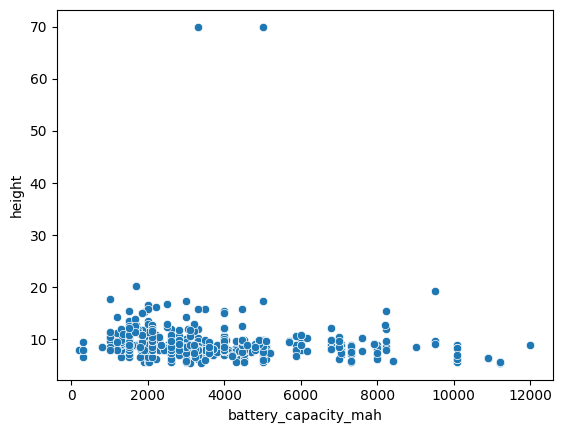

In [4]:
sns.scatterplot(data=samsung, x='battery_capacity_mah', y='height')

### Q2. Scatter plot (with hue): Do flagship devices pack more battery for the same thickness?


<Axes: xlabel='battery_capacity_mah', ylabel='height'>

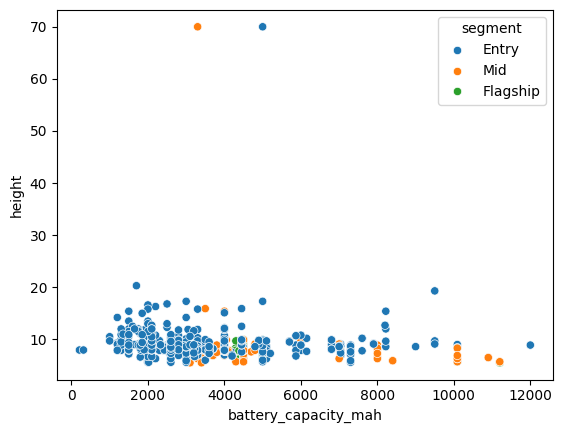

In [5]:
sns.scatterplot(data=samsung, x='battery_capacity_mah', y='height', hue='segment')

### Q3. Boxplot: Battery capacity distribution across Entry / Mid / Flagship segments.


<Axes: xlabel='segment', ylabel='battery_capacity_mah'>

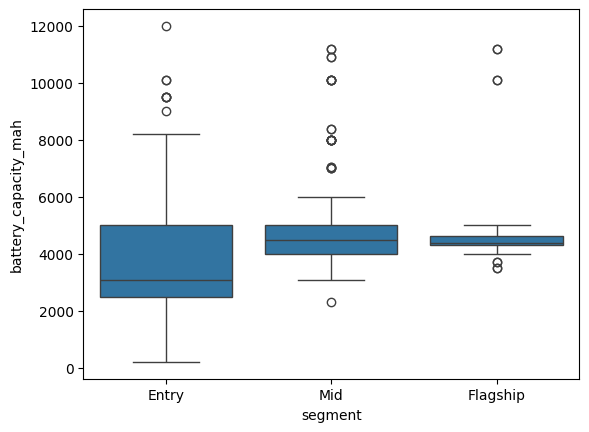

In [6]:
sns.boxplot(data=samsung, x='segment', y='battery_capacity_mah')

### Q4. Scatter plot: Is there a relationship between battery efficiency (mAh per volume) and device size?


<Axes: xlabel='battery_eff', ylabel='device_size'>

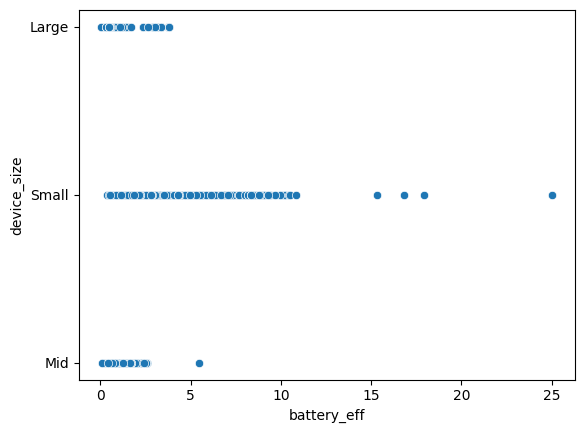

In [7]:
sns.scatterplot(data=samsung, x='battery_eff', y='device_size')

### Q5. Bar chart: Top 10 devices with the highest battery efficiency.


<Axes: xlabel='battery_eff', ylabel='Name'>

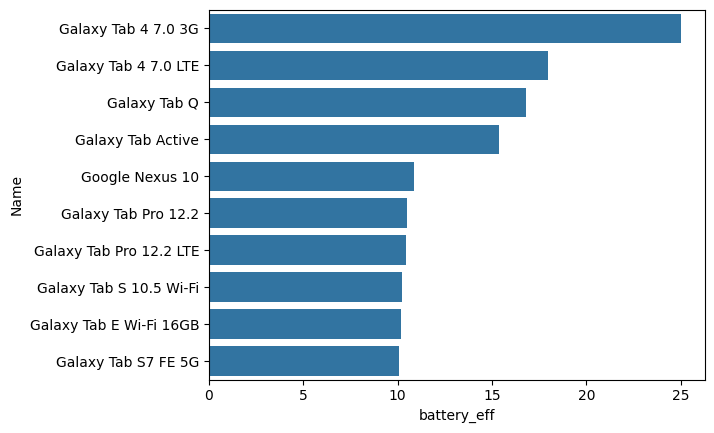

In [8]:
top10 = samsung.sort_values('battery_eff', ascending=False).head(10)
sns.barplot(data=top10, x='battery_eff', y='Name')

## 🧠 Performance & Hardware


### Q6. Count plot: Distribution of devices by SoC family.


<Axes: xlabel='soc_family', ylabel='count'>

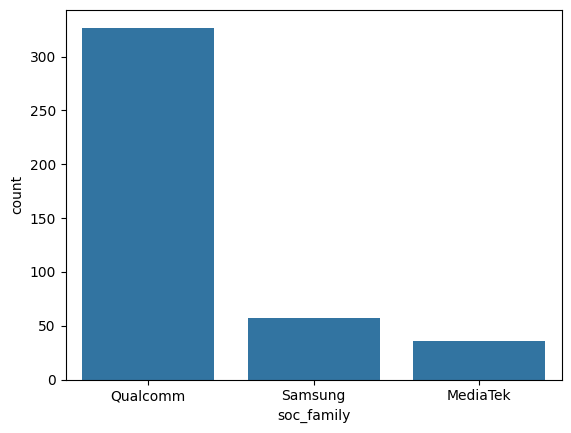

In [9]:
sns.countplot(data=samsung, x='soc_family')

### Q7. Boxplot: RAM distribution across different SoC families.


<Axes: xlabel='soc_family', ylabel='ram1_gb'>

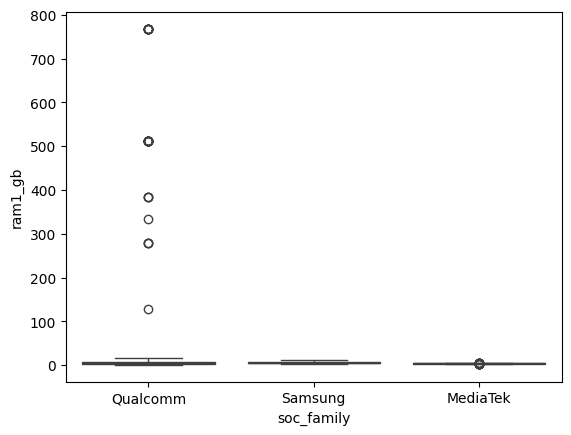

In [10]:
sns.boxplot(data=samsung, y='ram1_gb', x='soc_family')

### Q8. Scatter plot: Relationship between GPU clock speed and RAM frequency.


<Axes: xlabel='gpu_hertz_mhz', ylabel='ram_hertz_mhz'>

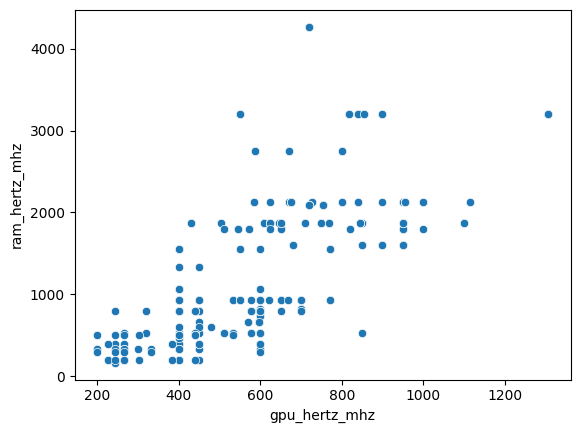

In [11]:
sns.scatterplot(data=samsung, x='gpu_hertz_mhz', y='ram_hertz_mhz')

### Q9. Bar chart: Average RAM per SoC model.


In [12]:
avgram = samsung.groupby('soc_core')['ram1_gb'].mean().reset_index()

<Axes: xlabel='ram1_gb', ylabel='soc_core'>

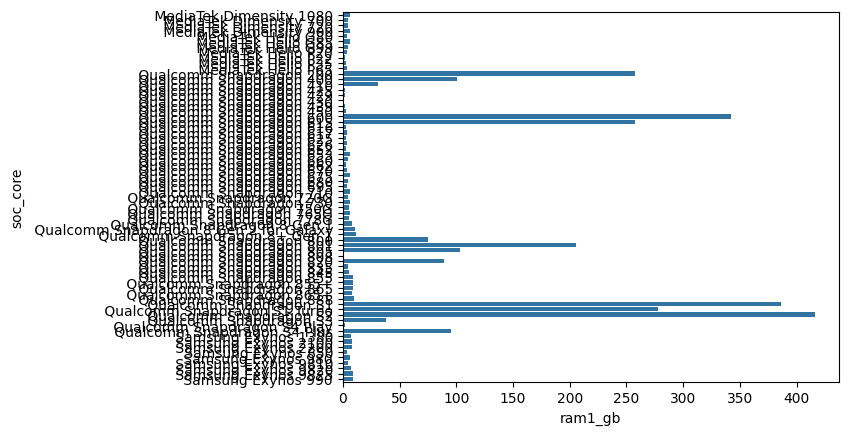

In [13]:
sns.barplot(data=avgram, y='soc_core', x='ram1_gb')

### Q10. Scatter plot: Are higher GPU clocks paired with larger displays?


<Axes: xlabel='gpu_hertz_mhz', ylabel='screen_size'>

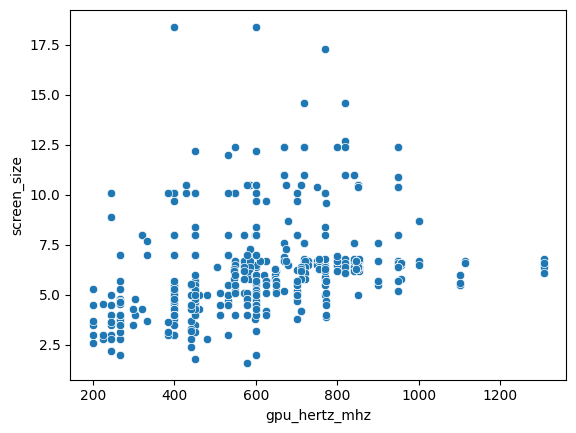

In [14]:
sns.scatterplot (data=samsung, x='gpu_hertz_mhz', y='screen_size')

## 🧠 Memory & Storage Strategy


### Q11. Count plot: Distribution of base RAM variants.


<Axes: xlabel='count', ylabel='ram1_gb'>

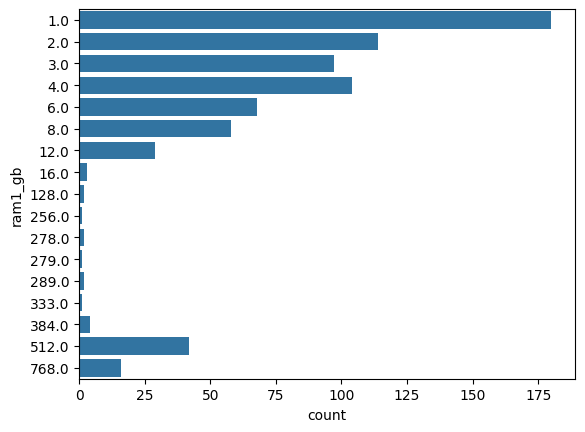

In [15]:
sns.countplot(data=samsung, y='ram1_gb')

### Q12. Stacked bar chart: RAM vs Storage variant availability.


<Axes: xlabel='rom1_gb', ylabel='ram1_gb'>

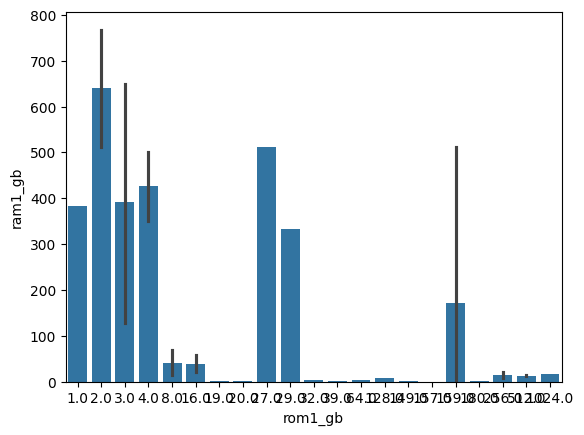

In [16]:
sns.barplot(data=samsung, y='ram1_gb', x='rom1_gb')

### Q13. Heatmap: Frequency of RAM–Storage combinations.


<Axes: xlabel='rom1_gb', ylabel='ram1_gb'>

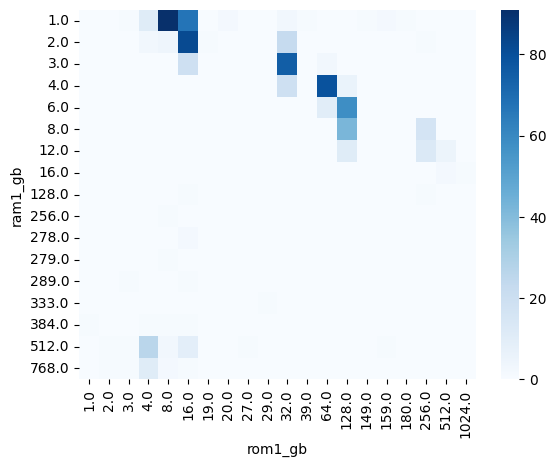

In [17]:
combo = pd.crosstab(samsung['ram1_gb'], samsung['rom1_gb'])
sns.heatmap(combo, cmap='Blues')

### Q14. Boxplot: Storage distribution across market segments.


<Axes: xlabel='rom1_gb', ylabel='segment'>

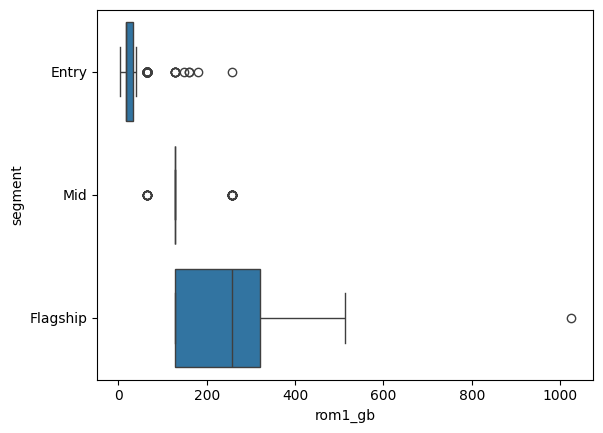

In [18]:
sns.boxplot(data=samsung, x='rom1_gb', y='segment')

### Q15. Bar chart: Percentage of devices offering multiple RAM / storage options.


<Axes: >

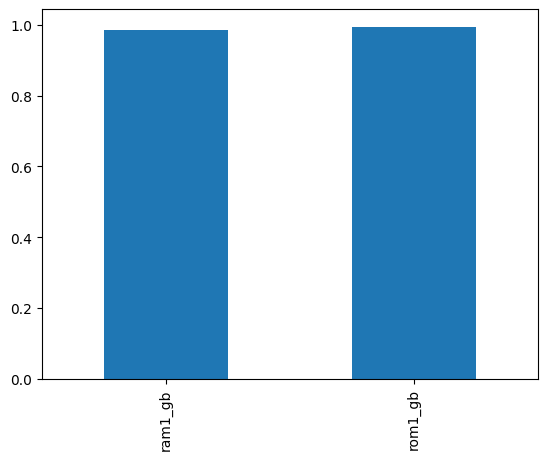

In [19]:
samsung[['ram1_gb','rom1_gb']].notna().mean().plot(kind='bar')

## 📷 Camera Capabilities


### Q16. Count plot: Most common primary camera resolutions.


<Axes: xlabel='count', ylabel='cam1_mp'>

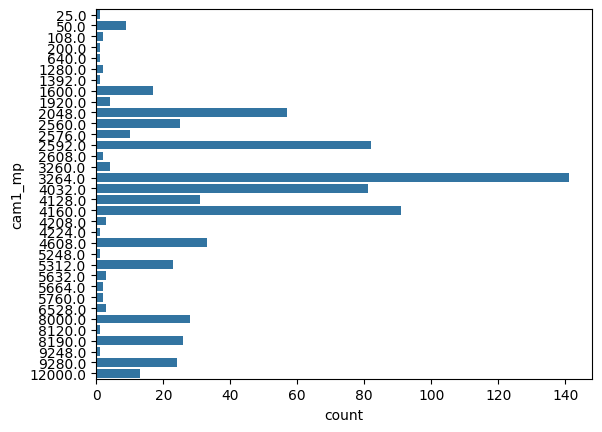

In [20]:
sns.countplot(data=samsung, y='cam1_mp')

### Q17. Boxplot: Camera MP distribution by market segment.


<Axes: xlabel='cam1_mp', ylabel='segment'>

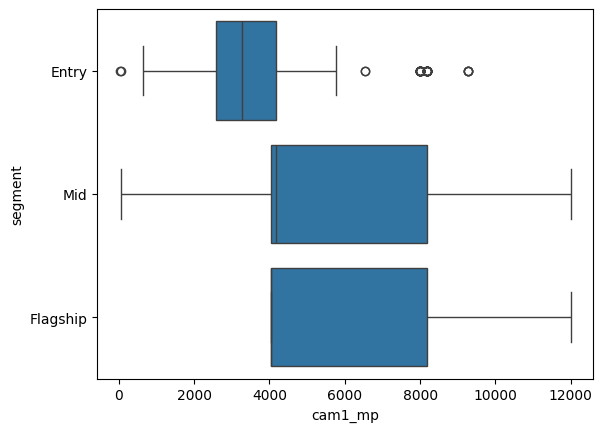

In [21]:
sns.boxplot(data=samsung, x='cam1_mp', y='segment')

### Q18. Scatter plot: Relationship between camera MP and RAM.


<Axes: xlabel='cam1_mp', ylabel='ram1_gb'>

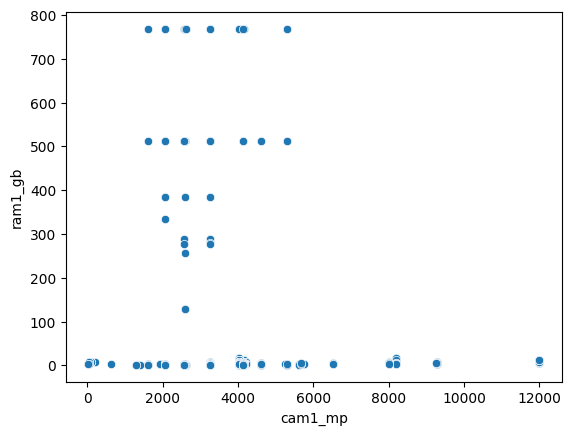

In [22]:
sns.scatterplot(data=samsung, x='cam1_mp', y='ram1_gb')

### Q19. Bar chart: Average FPS support by SoC generation.


<Axes: xlabel='fps', ylabel='soc_gen'>

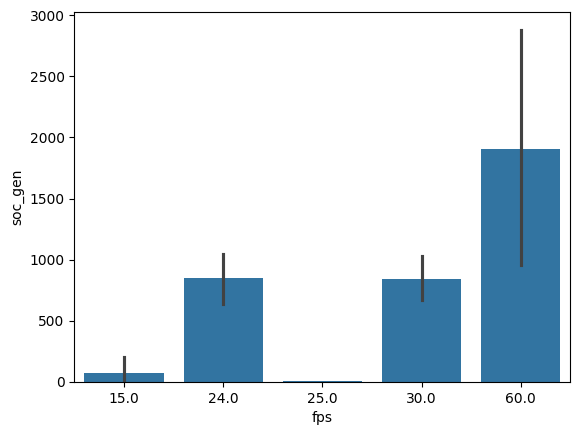

In [23]:
sns.barplot(data=samsung, x='fps', y='soc_gen')

### Q20. Boxplot: Camera performance differences across SoC tiers.


<Axes: xlabel='cam1_mp', ylabel='soc_tier'>

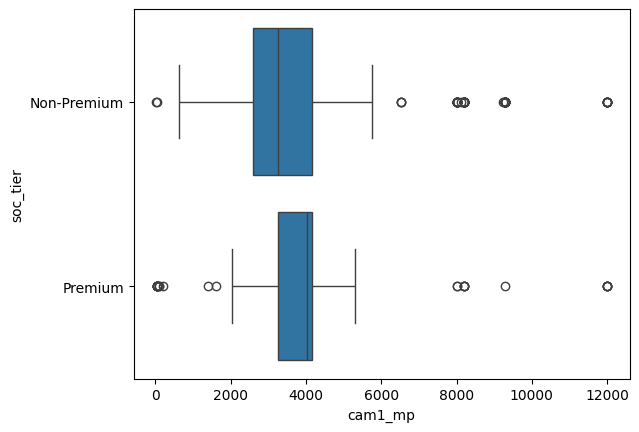

In [24]:
sns.boxplot(data=samsung, x='cam1_mp', y='soc_tier')

## 📱 Display & User Experience


### Q21. Histogram: Distribution of screen sizes.


<Axes: xlabel='screen_size', ylabel='Count'>

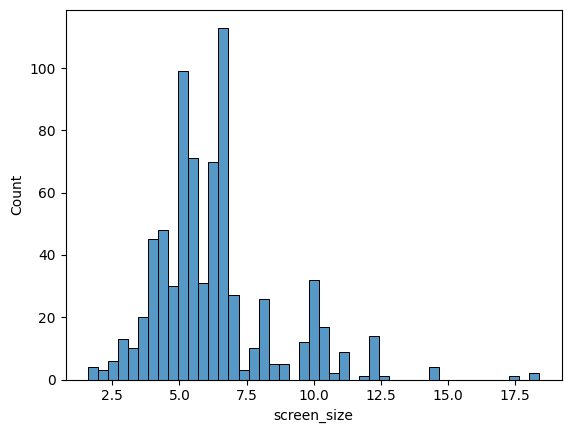

In [25]:
sns.histplot(data=samsung, x='screen_size')

### Q22. Scatter plot: Screen size vs battery capacity.


<Axes: xlabel='screen_size', ylabel='battery_capacity_mah'>

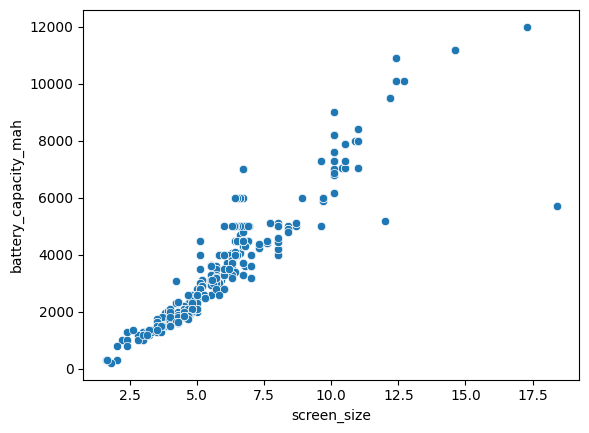

In [26]:
sns.scatterplot(data=samsung, x='screen_size', y='battery_capacity_mah')

### Q23. Scatter plot: PPI vs battery capacity (trade-off analysis).


<Axes: xlabel='PPI', ylabel='battery_capacity_mah'>

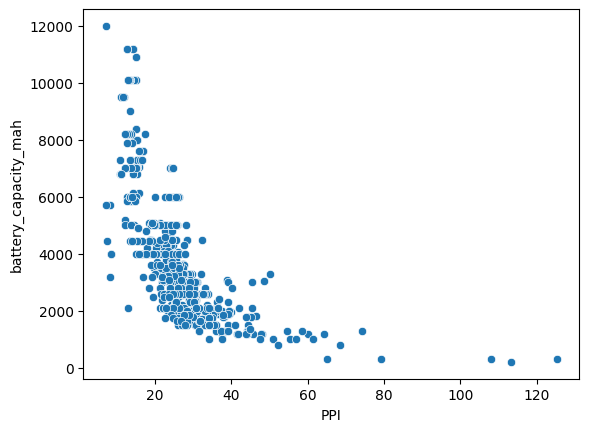

In [27]:
sns.scatterplot(data=samsung, x='PPI', y='battery_capacity_mah')

### Q24. Boxplot: Screen size differences across SoC tiers.


<Axes: xlabel='screen_size', ylabel='soc_tier'>

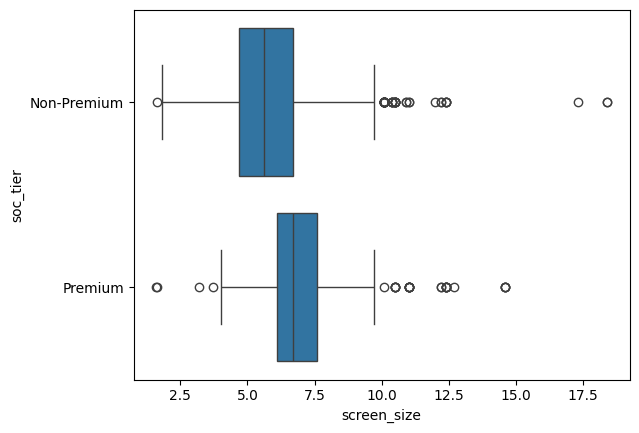

In [28]:
sns.boxplot(data=samsung, x='screen_size', y='soc_tier')

### Q25. Bar chart: Average screen size by market segment.


<Axes: xlabel='segment', ylabel='screen_size'>

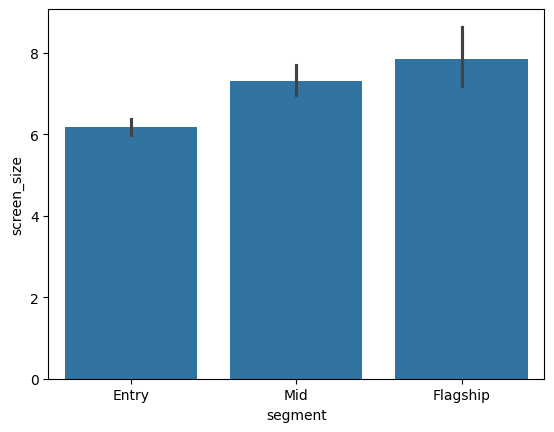

In [29]:
sns.barplot(data=samsung, x='segment', y='screen_size', estimator='mean')

## 🏷️ Market Segmentation


### Q26. Pie / bar chart: Share of Entry / Mid / Flagship devices.


<Axes: ylabel='segment'>

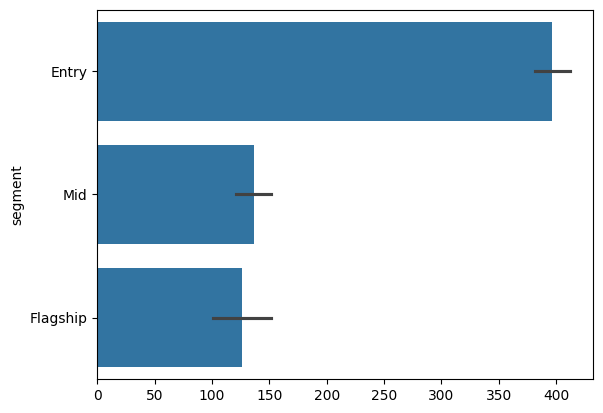

In [30]:
sns.barplot(samsung['segment'])

### Q27. Radar chart (optional): Spec comparison across segments.


<Axes: xlabel='segment', ylabel='ram1_gb'>

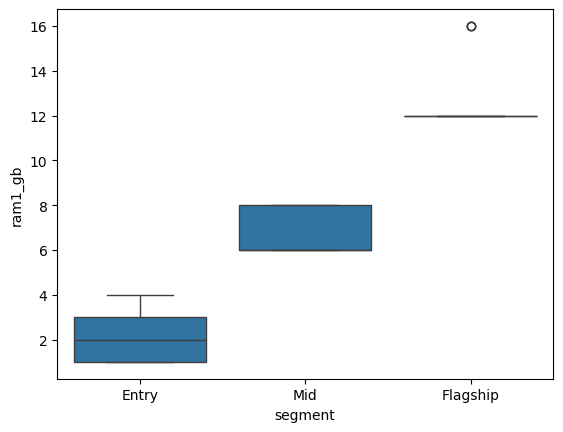

In [31]:
sns.boxplot(data=samsung, x='segment', y='ram1_gb')

### Q28. Boxplot: RAM, battery, and camera comparison across segments.


<Axes: xlabel='ram1_gb', ylabel='cam1_mp'>

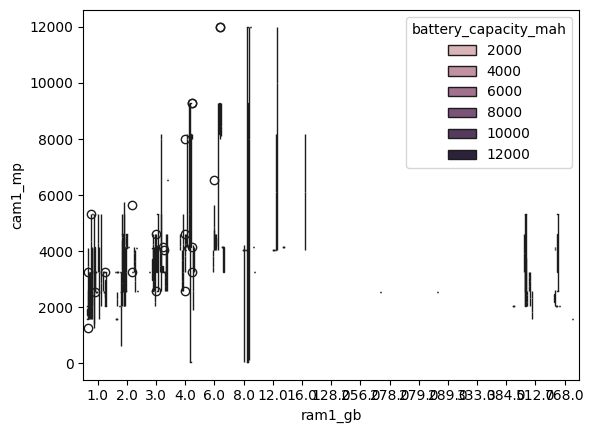

In [32]:
sns.boxplot(data=samsung, x='ram1_gb', hue='battery_capacity_mah', y='cam1_mp')

### Q29. Scatter plot: Spec efficiency comparison (Mid vs Flagship).


<Axes: xlabel='battery_eff', ylabel='segment'>

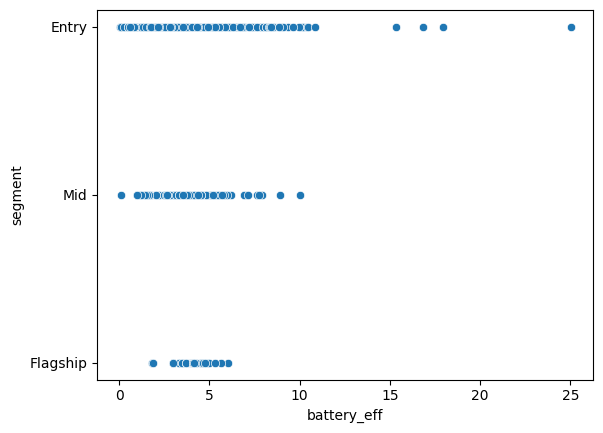

In [33]:
sns.scatterplot(data=samsung, x='battery_eff', y='segment')

### Q30. Bar chart: Specs showing least differentiation across segments.


<Axes: xlabel='battery_eff', ylabel='segment'>

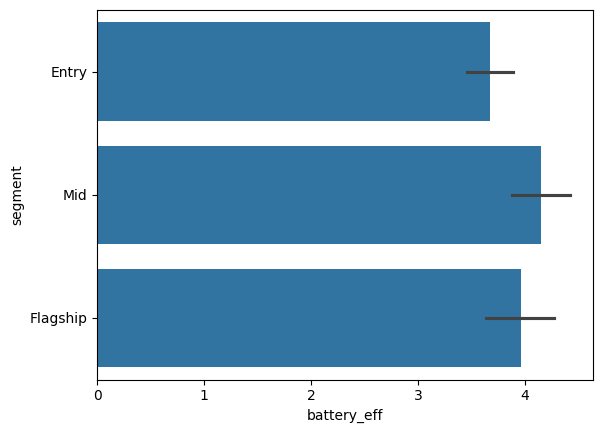

In [34]:
sns.barplot(data=samsung, x='battery_eff', y='segment')

## 🔄 Variant Strategy & Product Planning


### Q31. Bar chart: Devices with the highest number of variants.


<Axes: ylabel='Name'>

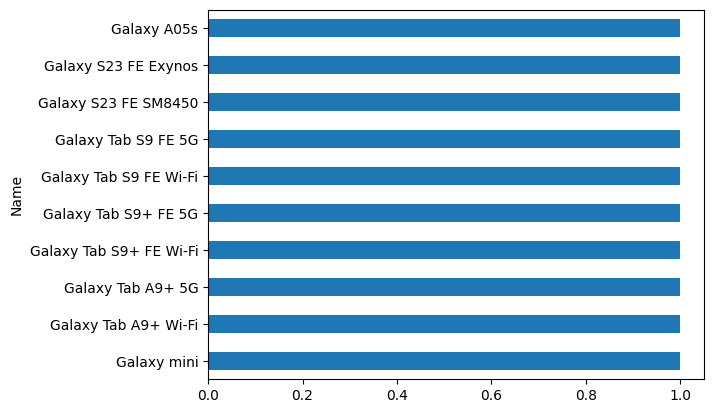

In [35]:
samsung['Name'].value_counts().head(10).plot(kind='barh')

### Q32. Stacked bar chart: RAM vs Storage as upgrade paths.


<Axes: >

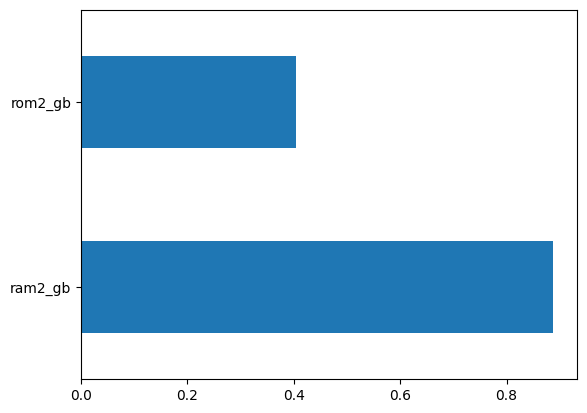

In [61]:
samsung[['ram2_gb','rom2_gb']].notna().mean().plot(kind='barh')

### Q33. Heatmap: SoC vs number of supported variants.


<Axes: ylabel='soc_core'>

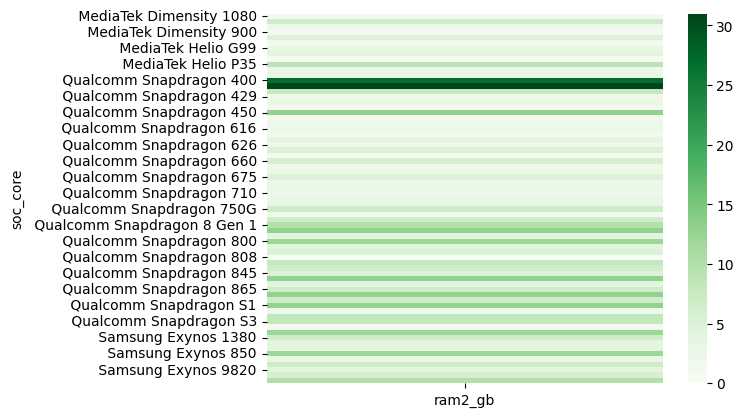

In [39]:
soc_var = samsung.groupby('soc_core')['ram2_gb'].count()
sns.heatmap(soc_var.to_frame(), cmap='Greens')

### Q34. Boxplot: Spec variation within mid-range vs flagship devices.


<Axes: xlabel='ram1_gb', ylabel='segment'>

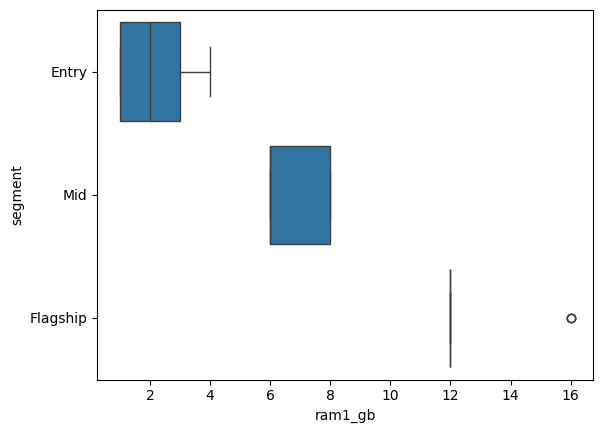

In [40]:
sns.boxplot(data=samsung, x='ram1_gb', y='segment')

### Q35. Bar chart: SoCs reused across multiple market tiers.


<Axes: xlabel='segment', ylabel='soc_core'>

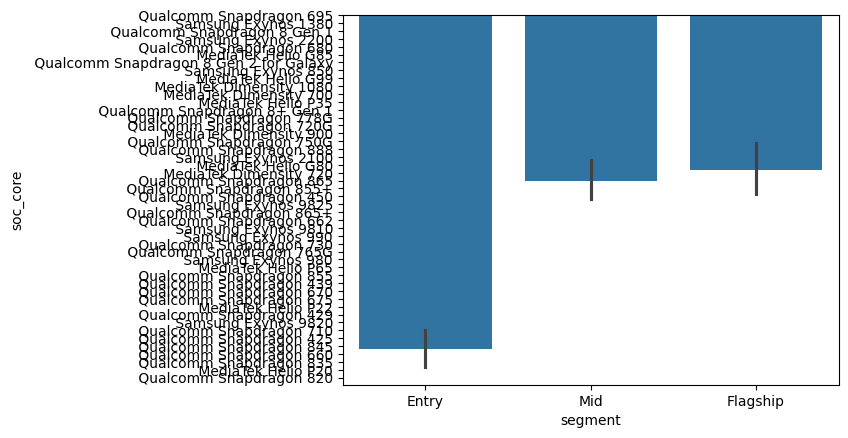

In [42]:
sns.barplot(data=samsung, y='soc_core', x='segment')

## ⚙️ Optimization & Value Analysis


### Q36. Scatter plot: RAM per battery capacity ratio.


<Axes: xlabel='ram1_gb', ylabel='battery_capacity_mah'>

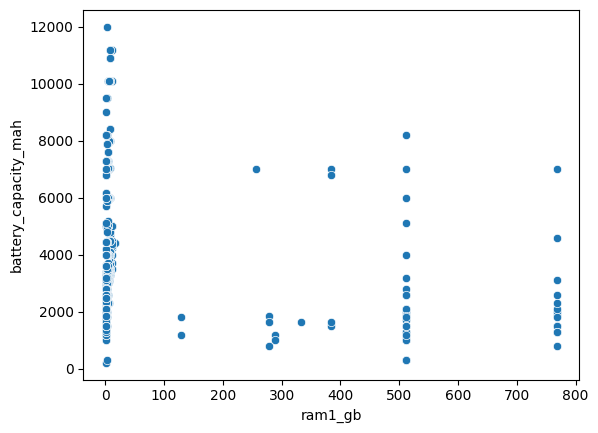

In [45]:
sns.scatterplot(data=samsung, x='ram1_gb', y='battery_capacity_mah')

### Q37. Bubble chart: Performance vs size vs battery (3D insight).


<Axes: xlabel='ram1_gb', ylabel='volume'>

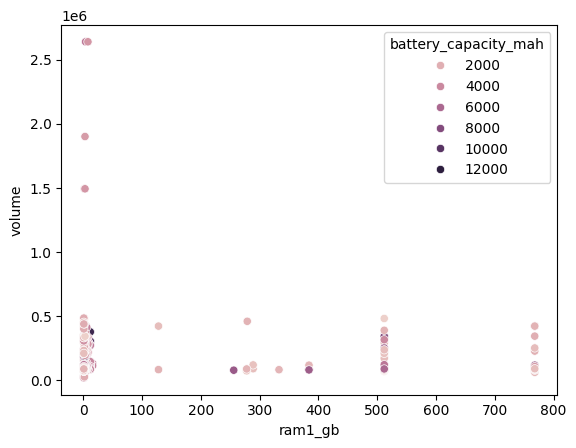

In [46]:
sns.scatterplot(data=samsung, x='ram1_gb', y='volume', hue='battery_capacity_mah')

### Q38. Scatter plot: Identify over-specced compact devices.


<Axes: xlabel='spec_score', ylabel='Name'>

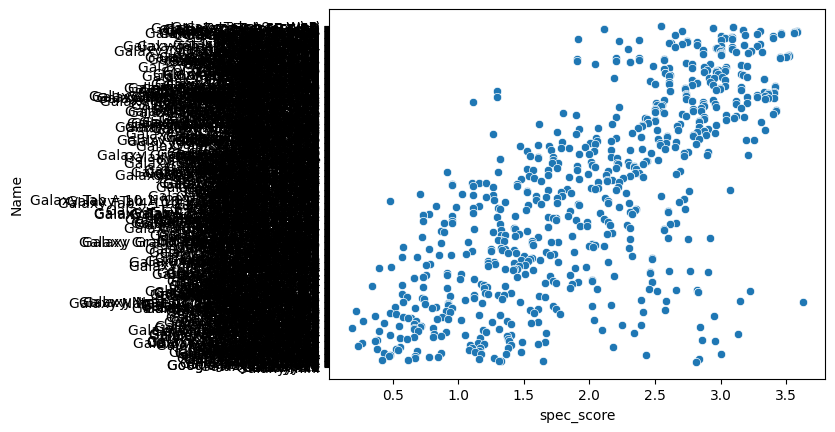

In [49]:
sns.scatterplot(data=samsung, x='spec_score', y='Name')

### Q39. Ranking bar chart: Best overall spec balance scores.


<Axes: xlabel='spec_score', ylabel='Name'>

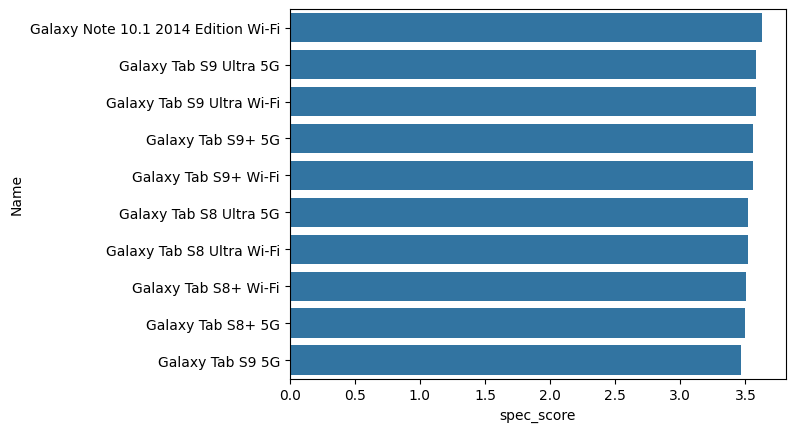

In [53]:
best_bal = samsung.sort_values('spec_score', ascending=False).head(10)
sns.barplot(data=best_bal, x='spec_score', y='Name')

### Q40. Heatmap: Feature importance across flagship devices.


<Axes: ylabel='segment'>

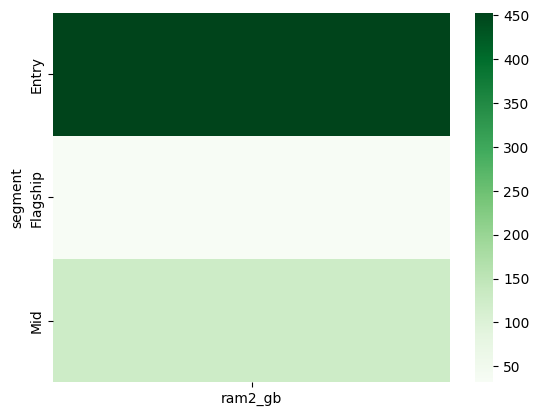

In [54]:
soc_var = samsung.groupby('segment')['ram2_gb'].count()
sns.heatmap(soc_var.to_frame(), cmap='Greens')

## 🔥 BONUS (LinkedIn-Winning Visuals)


### Q41. Outlier scatter plot: Devices that break usual trends.


<Axes: xlabel='volume', ylabel='battery_eff'>

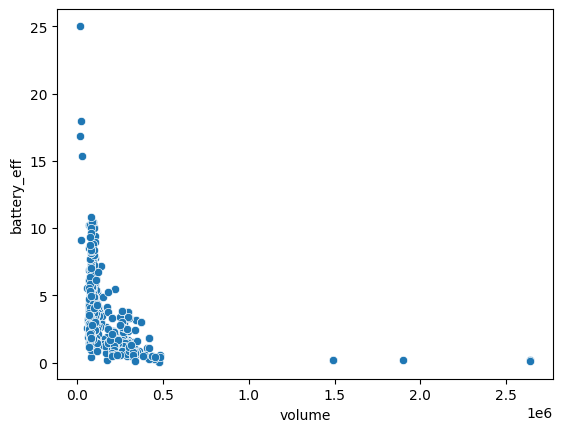

In [55]:
sns.scatterplot(data=samsung, x='volume', y='battery_eff')

### Q42. Line plot: Spec improvement trends across SoC generations.


<Axes: xlabel='spec_score', ylabel='soc_gen'>

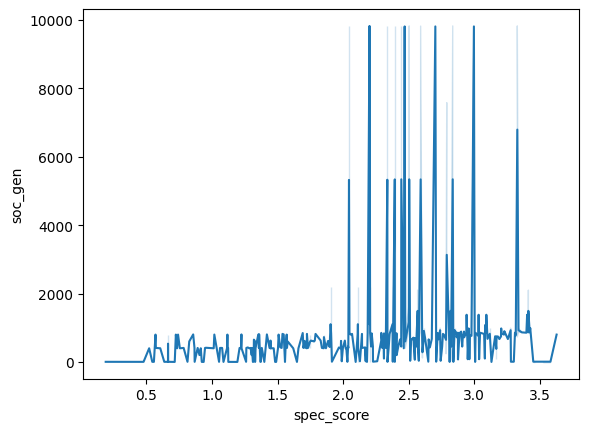

In [56]:
sns.lineplot(data=samsung, x='spec_score', y='soc_gen')

### Q43. Scatter plot: Diminishing returns (RAM vs camera vs battery).


<Axes: xlabel='ram1_gb', ylabel='cam1_mp'>

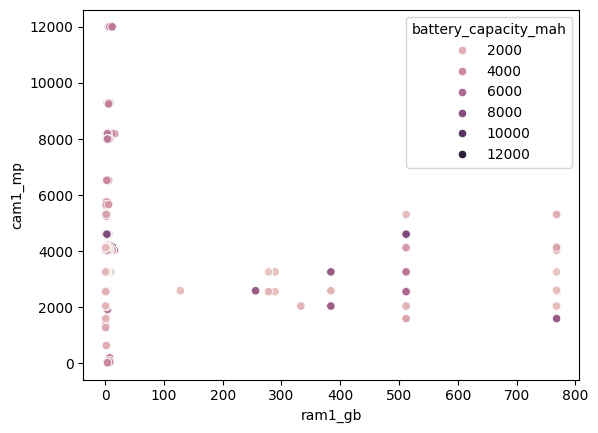

In [57]:
sns.scatterplot(data=samsung, x='ram1_gb', y='cam1_mp', hue='battery_capacity_mah')

### Q44. Correlation heatmap: Key hardware relationships.


<Axes: >

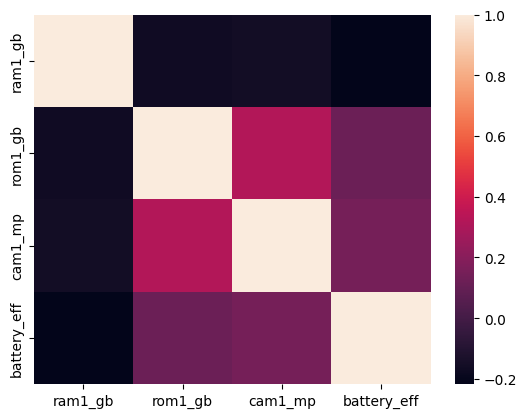

In [63]:
sns.heatmap(data=samsung[['ram1_gb', 'rom1_gb','cam1_mp','battery_eff']].corr())

### Q45. Bar chart: Most dominant spec combinations in the market.

<Axes: xlabel='ram1_gb', ylabel='rom1_gb'>

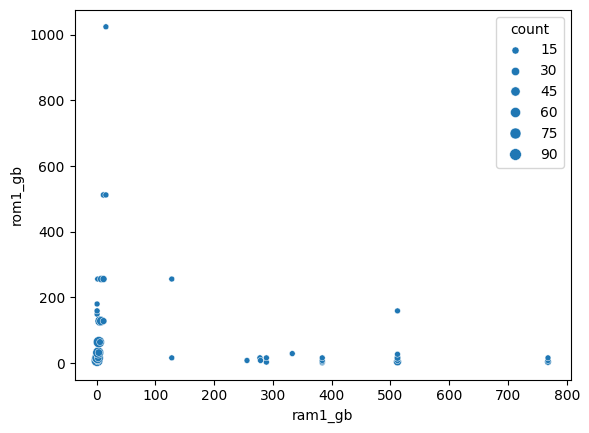

In [58]:
combo = samsung.groupby(['ram1_gb','rom1_gb']).size().reset_index(name='count')
sns.scatterplot(data=combo, x='ram1_gb', y='rom1_gb', size='count')